<a href="https://colab.research.google.com/github/MOHAMEDelJAMAAI/ML-TEST-SO/blob/main/ML_test_so.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install catboost

# **Importing the necessary libraries**:


Import essential libraries like pandas, scikit-learn, and numpy....

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor, SGDRegressor, ARDRegression, RidgeCV, LassoCV, ElasticNetCV, TweedieRegressor, HuberRegressor, RANSACRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer, OrdinalEncoder
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_regression, mutual_info_regression, RFECV, SequentialFeatureSelector
import warnings, re, joblib
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor
from scipy.stats import probplot
from yellowbrick.regressor import AlphaSelection, ResidualsPlot, PredictionError
from yellowbrick.features import Rank2D
import plotly.express as px


# **Loading the dataset**:

Load the stores_sales.csv dataset using pandas

In [ ]:
df = pd.read_csv('stores_sales.csv')
df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   date          6435 non-null   object 
 2   weekly_sales  6435 non-null   float64
 3   holiday_flag  6435 non-null   int64  
 4   temperature   6435 non-null   float64
 5   fuel_Price    6435 non-null   float64
 6   cpi           6435 non-null   float64
 7   unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_Price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# **Exploring Numeric Feature Distributions and Characteristics** :

# Univariate Analysis


In this step, we are exploring the distributions and characteristics of the numeric features in the dataset

Skewness of store: 0.0
Kurtosis of store: -1.2011866346083275


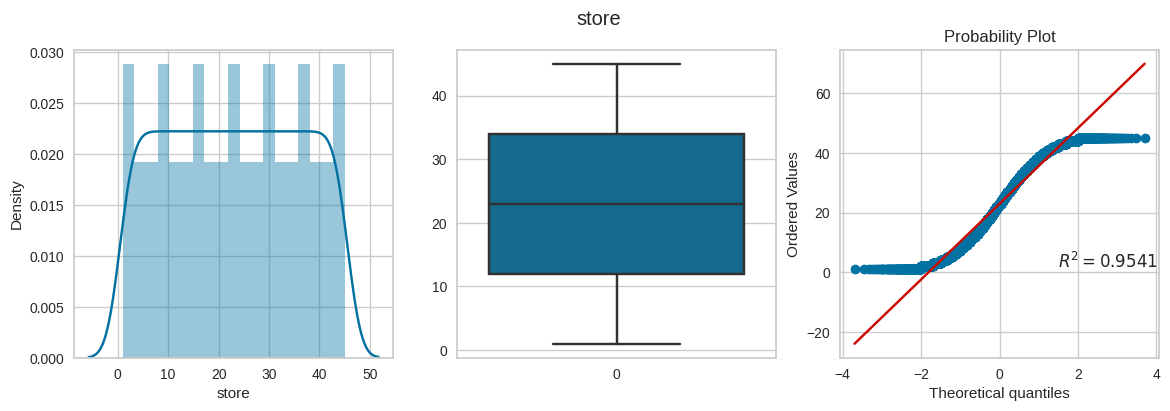

Skewness of weekly_sales: 0.6683617974864524
Kurtosis of weekly_sales: 0.05314092741722032


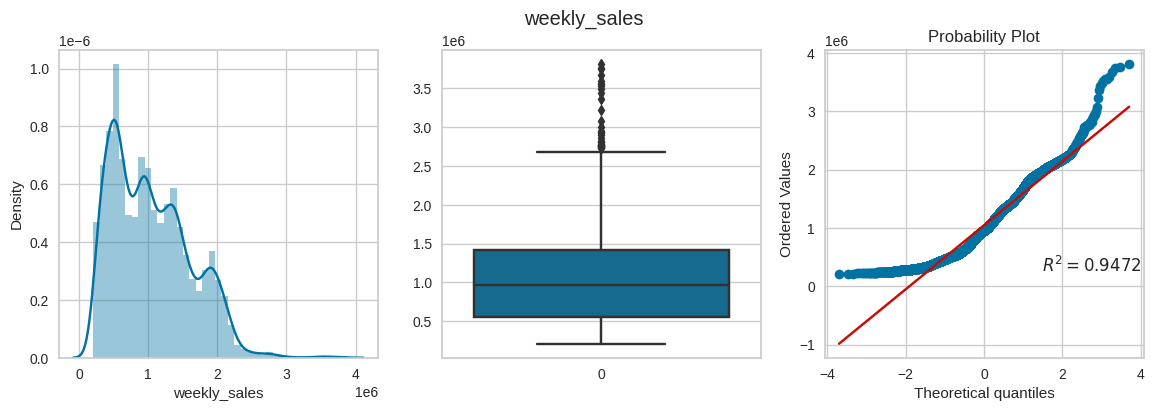

Skewness of holiday_flag: 3.3734986714578485
Kurtosis of holiday_flag: 9.383409556463409


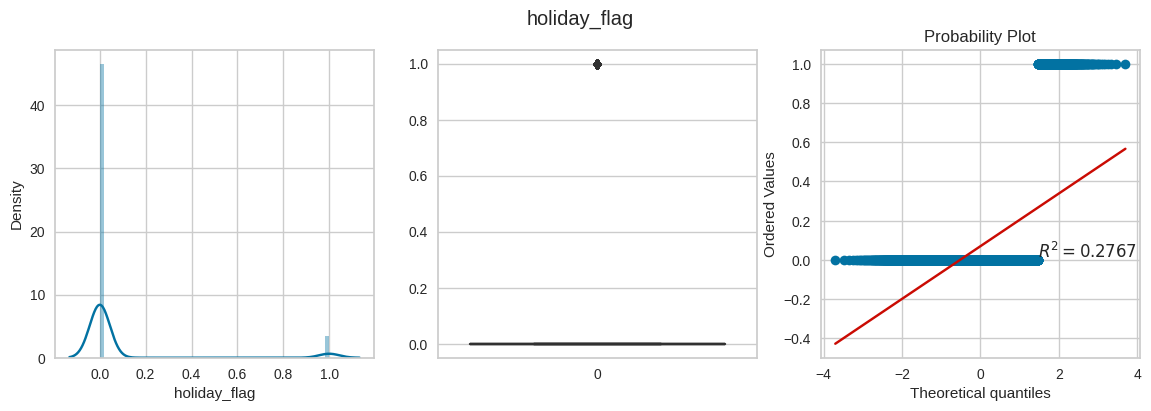

Skewness of temperature: -0.3367676011075799
Kurtosis of temperature: -0.6128009588453383


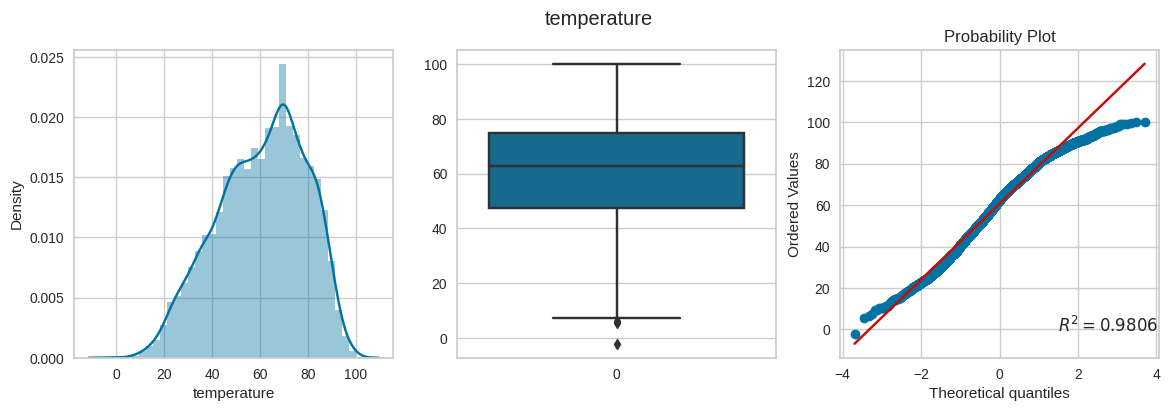

Skewness of fuel_Price: -0.09615830011865549
Kurtosis of fuel_Price: -1.1773777964906604


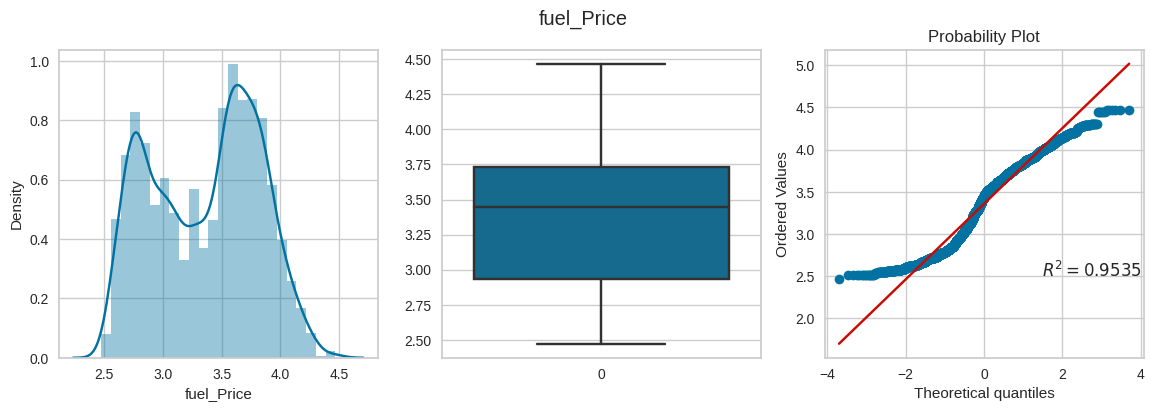

Skewness of cpi: 0.06349184988549494
Kurtosis of cpi: -1.8398133421838165


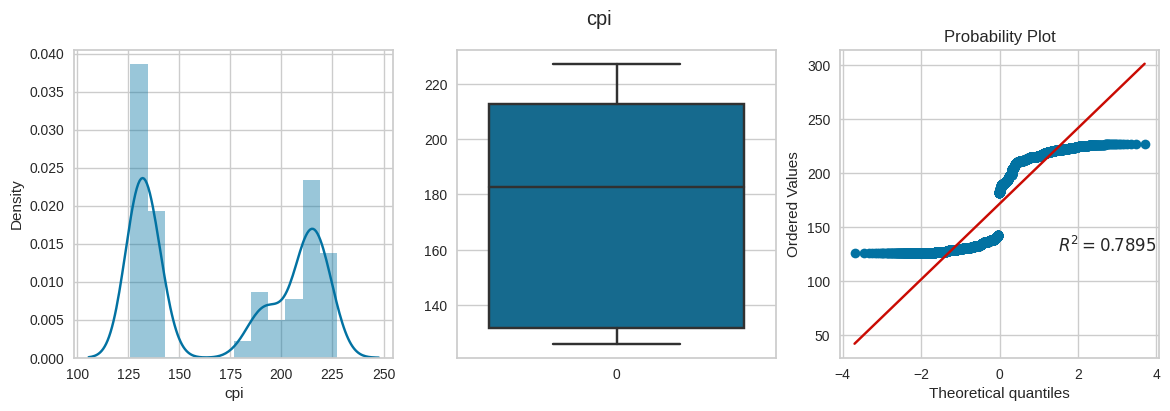

Skewness of unemployment: 1.1881439334843265
Kurtosis of unemployment: 2.639711784234234


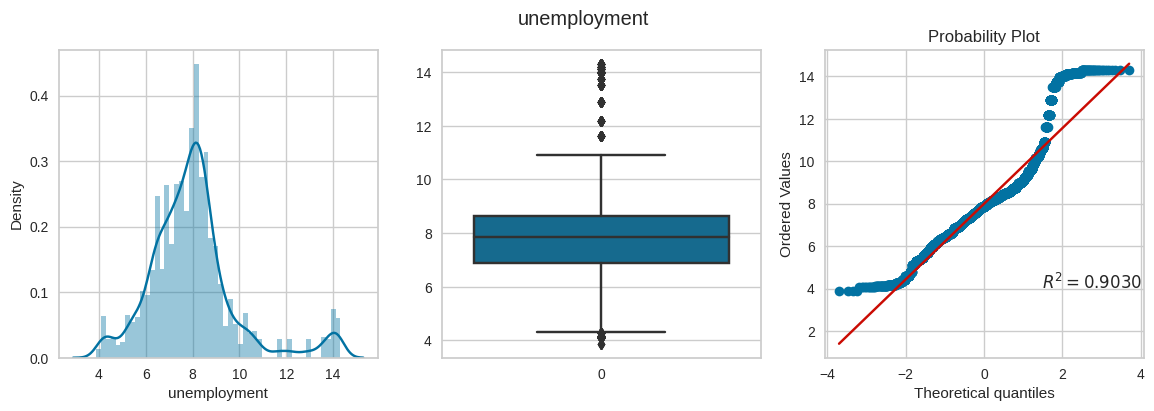

In [ ]:
for col in df.select_dtypes(np.number).columns:
    plt.figure(figsize=(14,4))
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show();

In [ ]:
df.corr()['weekly_sales'].sort_values(ascending=False)[1:]

holiday_flag    0.036891
fuel_Price      0.009464
temperature    -0.063810
cpi            -0.072634
unemployment   -0.106176
store          -0.335332
Name: weekly_sales, dtype: float64

# **Removing Outliers from a Column**


In [ ]:
def remove_outliers(col):
    lower_limit, upper_limit = df[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

In [ ]:
outlier_cols = ['weekly_sales','temperature','unemployment']

for col in outlier_cols:
    df[col] = remove_outliers(col)

# **Applying Data Transform and Visualization**


In [ ]:
def apply_transform(transform,col):
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f'{col} Before Transform')
    plt.show()
    col_tf = transform.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(col_tf)
    plt.subplot(132)
    sns.boxplot(col_tf)
    plt.subplot(133)
    probplot(col_tf,rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f'{col} After Transform')
    plt.show();

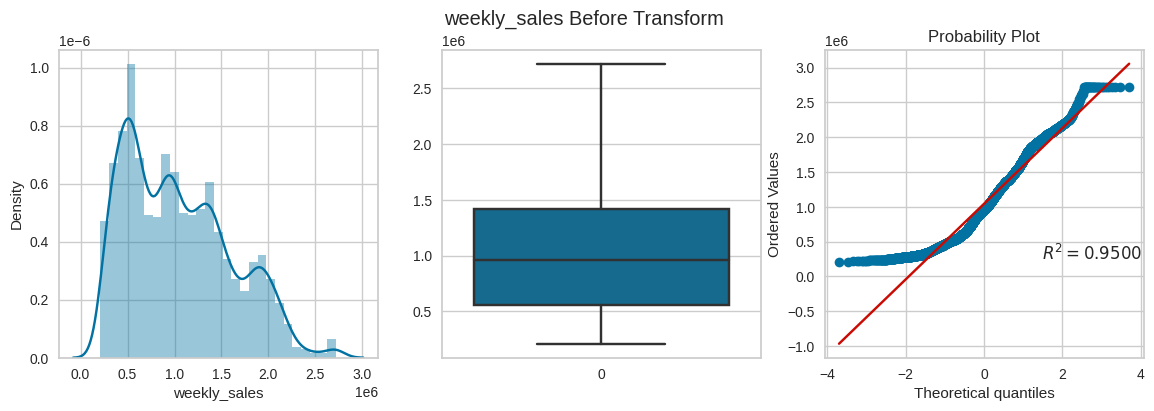

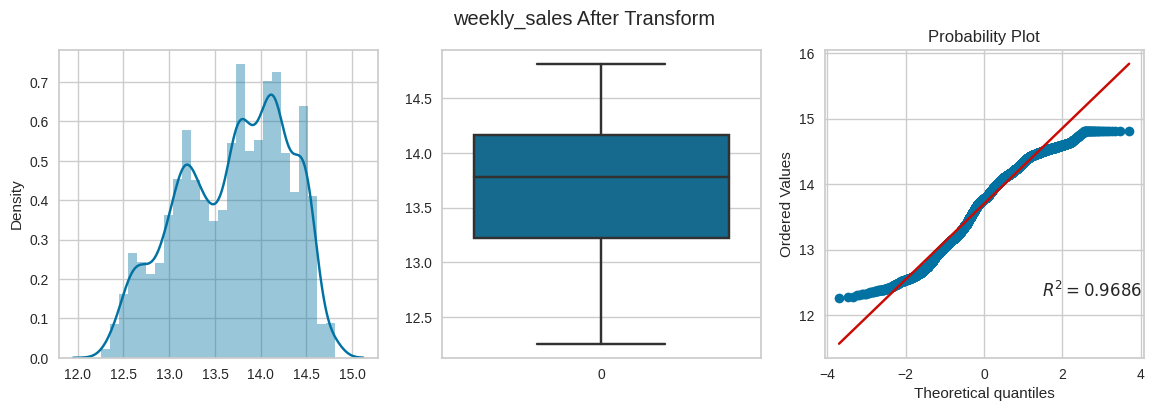

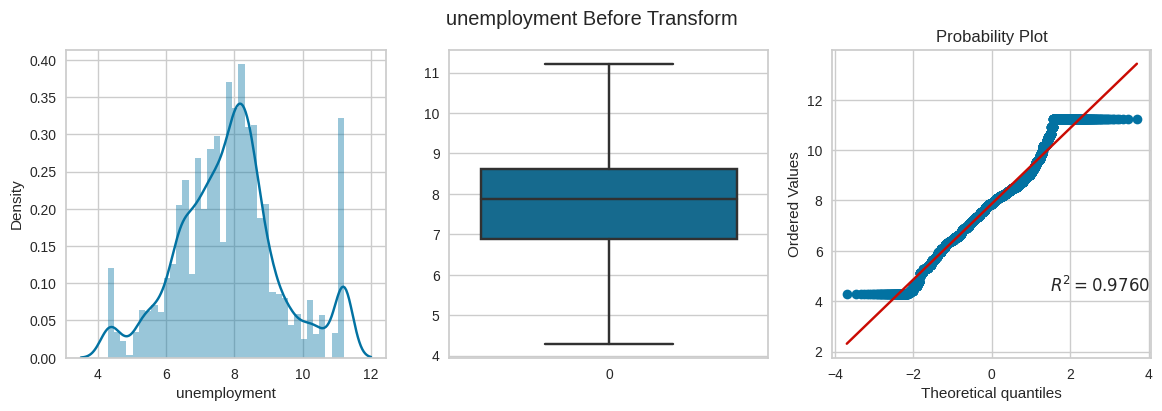

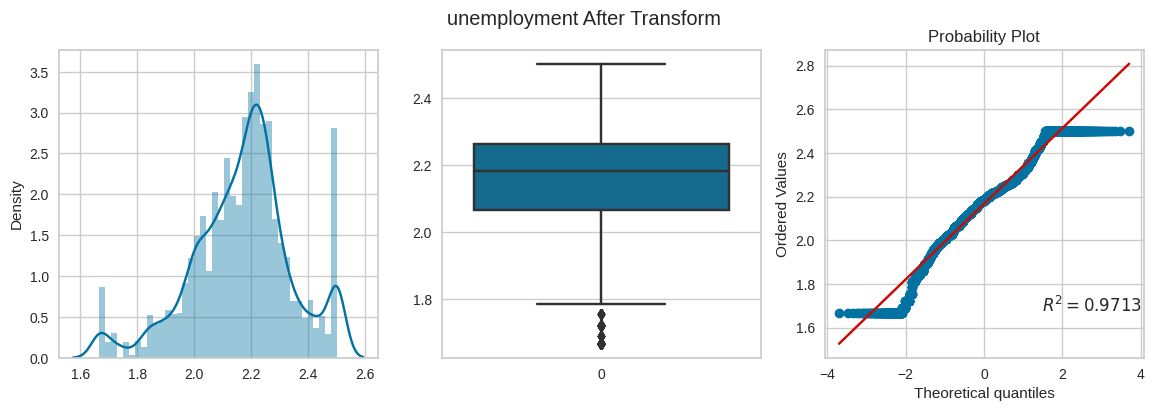

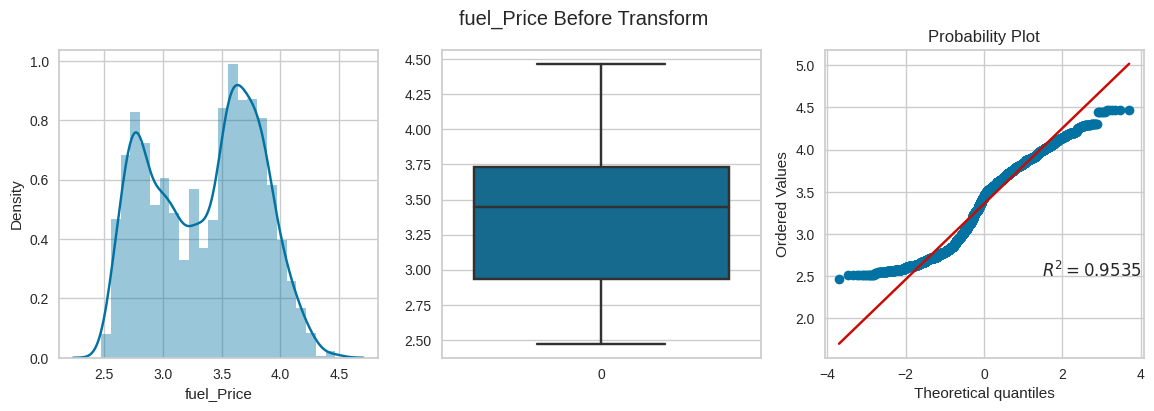

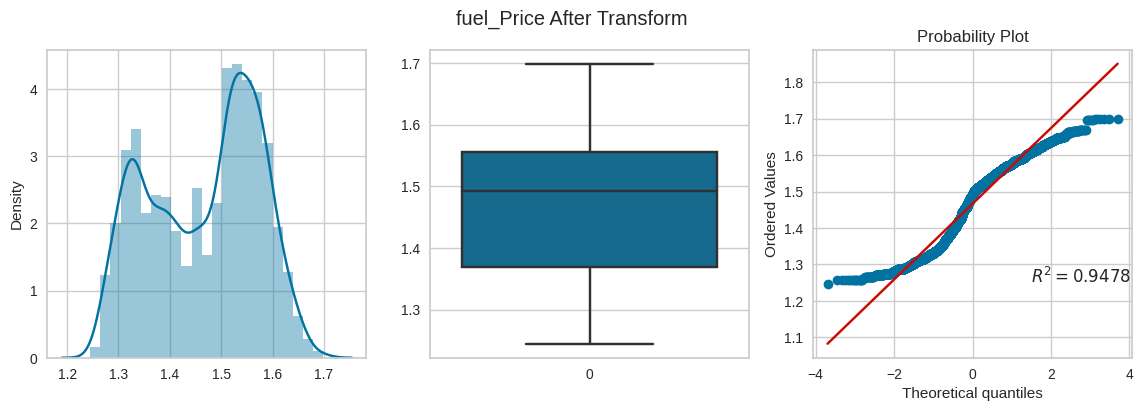

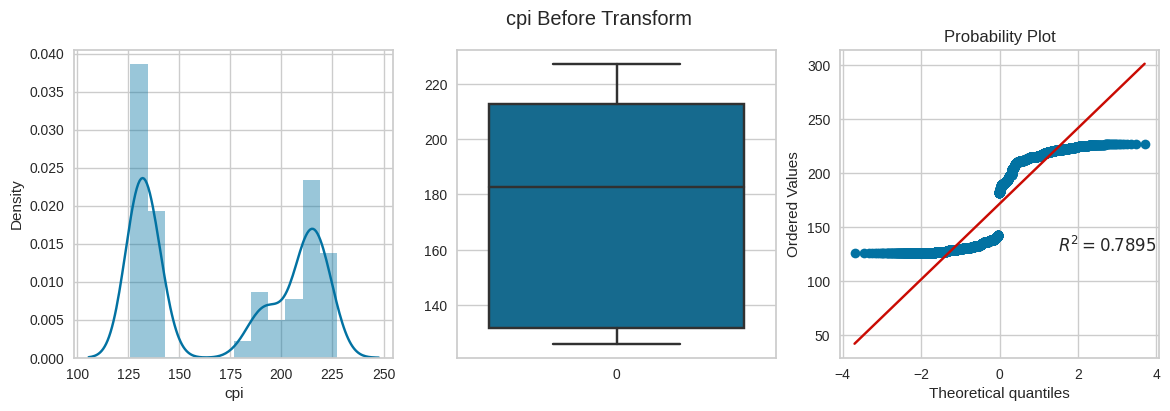

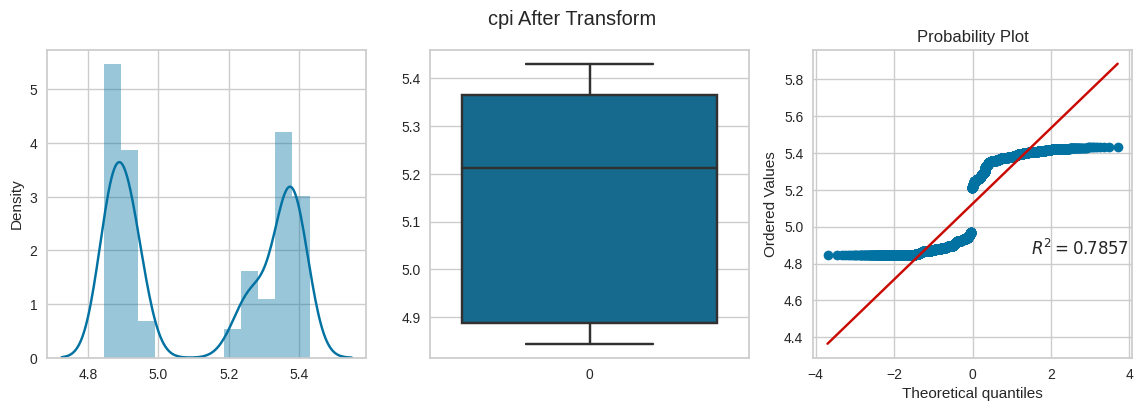

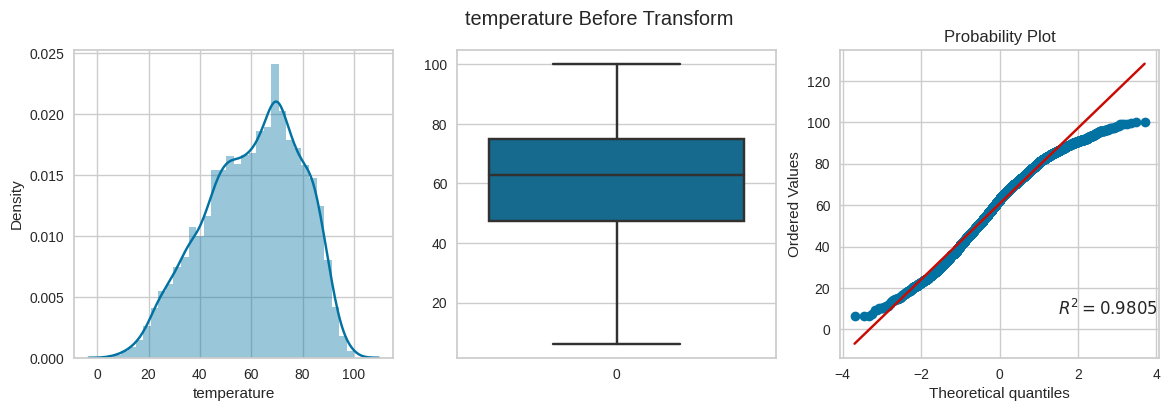

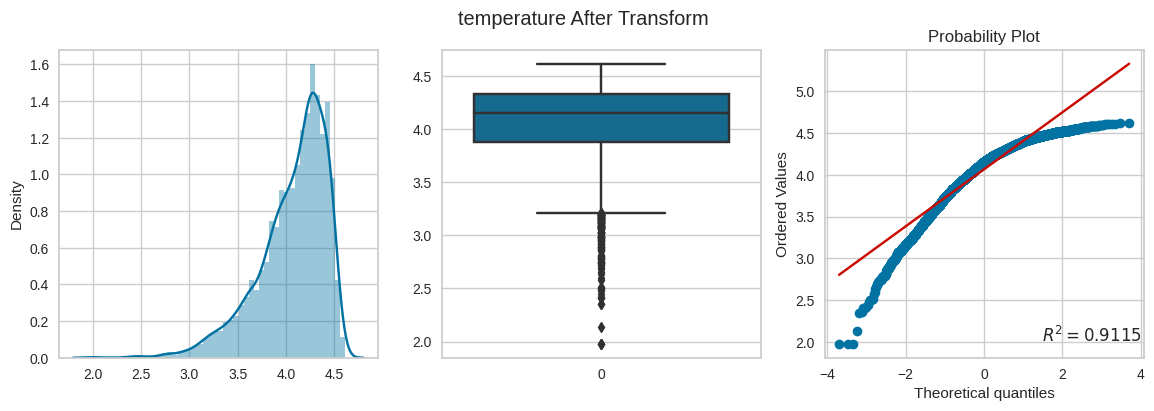

In [ ]:
skewed_cols = ['weekly_sales','unemployment','fuel_Price','cpi','temperature']

for col in skewed_cols:
    apply_transform(FunctionTransformer(np.log1p),col)

In [ ]:
pt = PowerTransformer()
pt_cols = ['weekly_sales','unemployment','temperature']

for col in pt_cols:
    col_tf = pt.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    df[col] = col_tf

In [ ]:
ft = FunctionTransformer(lambda x: x**2)
ft_cols = ['fuel_Price','cpi']

for col in ft_cols:
    col_tf = ft.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    df[col] = col_tf

# **Feature Extraction**

In [ ]:
df.date = pd.to_datetime(df.date,errors='coerce')

In [ ]:
df['Year'] = df.date.dt.year
df['Month'] = df.date.dt.month_name()
df['Day'] = df.date.dt.day_name()
df['Days_In_Month'] = df.date.dt.daysinmonth
df['Is_Leap_Year'] = df.date.dt.is_leap_year
df['Is_Quarter_Start'] = df.date.dt.is_quarter_start
df['Is_Quarter_End'] = df.date.dt.is_quarter_end
df['Is_Year_End'] = df.date.dt.is_year_end
df['Is_Month_Start'] = df.date.dt.is_month_start
df['Is_Month_End'] = df.date.dt.is_month_end
df['Day_Of_Year'] = df.date.dt.day_of_year
df['Day_Of_Week'] = df.date.dt.day_of_week

In [ ]:
df.drop('date',axis=1,inplace=True)

# **Categorical Encoding**

In [ ]:
oe = OrdinalEncoder(categories=[['January','February','March','April','May','June','July','August','September','October','November','December']])
df.Month = oe.fit_transform(df[['Month']])
df.Month = df.Month.astype(int)

In [ ]:
oe = OrdinalEncoder(categories=[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']])
df.Day = oe.fit_transform(df[['Day']])
df.Day = df.Day.astype(int)

In [ ]:
df.Is_Leap_Year = df.Is_Leap_Year.astype(int)
df.Is_Quarter_Start = df.Is_Quarter_Start.astype(int)
df.Is_Quarter_End = df.Is_Quarter_End.astype(int)
df.Is_Year_End = df.Is_Year_End.astype(int)
df.Is_Month_Start = df.Is_Month_Start.astype(int)
df.Is_Month_End = df.Is_Month_End.astype(int)

# **Feature Splitting**

In [ ]:
X = df.drop('weekly_sales',axis=1)
y = df.weekly_sales

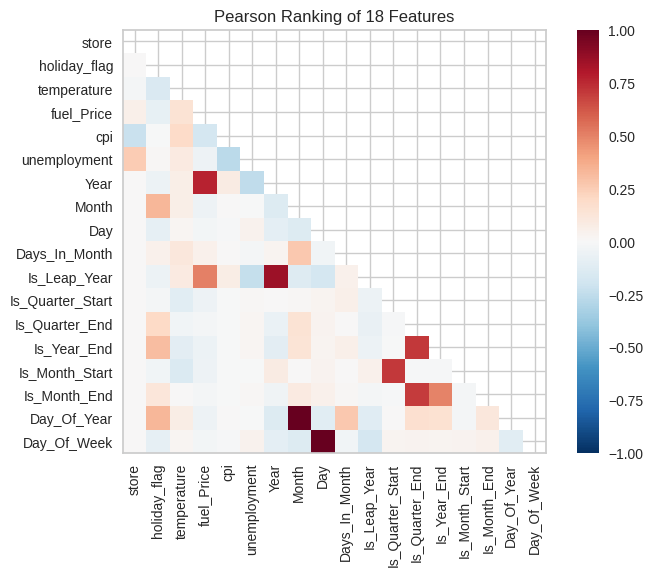

In [ ]:
ranking_2d = Rank2D(algorithm='pearson')
ranking_2d.fit(X,y)
ranking_2d.transform(X)
ranking_2d.show();

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)

# **Feature Selection**

In [ ]:
kbest = SelectKBest(k=6,score_func=f_regression)
kbest.fit(X_train,y_train)

SelectKBest(k=6, score_func=<function f_regression at 0x79caf02d89d0>)

In [ ]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['store', 'temperature', 'cpi', 'unemployment', 'Month',
       'Day_Of_Year'], dtype=object)

In [ ]:
percentile = SelectPercentile(percentile=30,score_func=f_regression)
percentile.fit(X_train,y_train)

SelectPercentile(percentile=30,
                 score_func=<function f_regression at 0x79caf02d89d0>)

In [ ]:
selected_features = percentile.get_feature_names_out()
selected_features

array(['store', 'temperature', 'cpi', 'unemployment', 'Month',
       'Day_Of_Year'], dtype=object)

In [ ]:
sfm = SelectFromModel(RandomForestRegressor(),threshold='median')
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestRegressor(), threshold='median')

In [ ]:
selected_features = sfm.get_feature_names_out()
selected_features

array(['store', 'holiday_flag', 'temperature', 'fuel_Price', 'cpi',
       'unemployment', 'Month', 'Day_Of_Year', 'Day_Of_Week'],
      dtype=object)

In [ ]:
rfe = RFECV(estimator=RandomForestRegressor(),min_features_to_select=6,step=2,cv=5,verbose=1)
rfe.fit(X_train,y_train)

Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 featur

RFECV(cv=5, estimator=RandomForestRegressor(), min_features_to_select=6, step=2,
      verbose=1)

In [ ]:
selected_features = rfe.get_feature_names_out()
selected_features

array(['store', 'holiday_flag', 'temperature', 'fuel_Price', 'cpi',
       'unemployment', 'Year', 'Month', 'Day', 'Days_In_Month',
       'Is_Leap_Year', 'Is_Quarter_End', 'Is_Year_End', 'Is_Month_End',
       'Day_Of_Year', 'Day_Of_Week'], dtype=object)

In [ ]:
sfs = SequentialFeatureSelector(estimator=RandomForestRegressor(),n_features_to_select=6,direction='forward',cv=3)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=3, estimator=RandomForestRegressor(),
                          n_features_to_select=6)

In [ ]:
selected_features = sfs.get_feature_names_out()
selected_features

array(['store', 'temperature', 'cpi', 'unemployment', 'Day',
       'Day_Of_Year'], dtype=object)

In [ ]:
lasso = SelectFromModel(estimator=LassoCV(),threshold='0.95*mean')
lasso.fit(X_train,y_train)

SelectFromModel(estimator=LassoCV(), threshold='0.95*mean')

In [ ]:
selected_features = lasso.get_feature_names_out()
selected_features

array(['store'], dtype=object)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

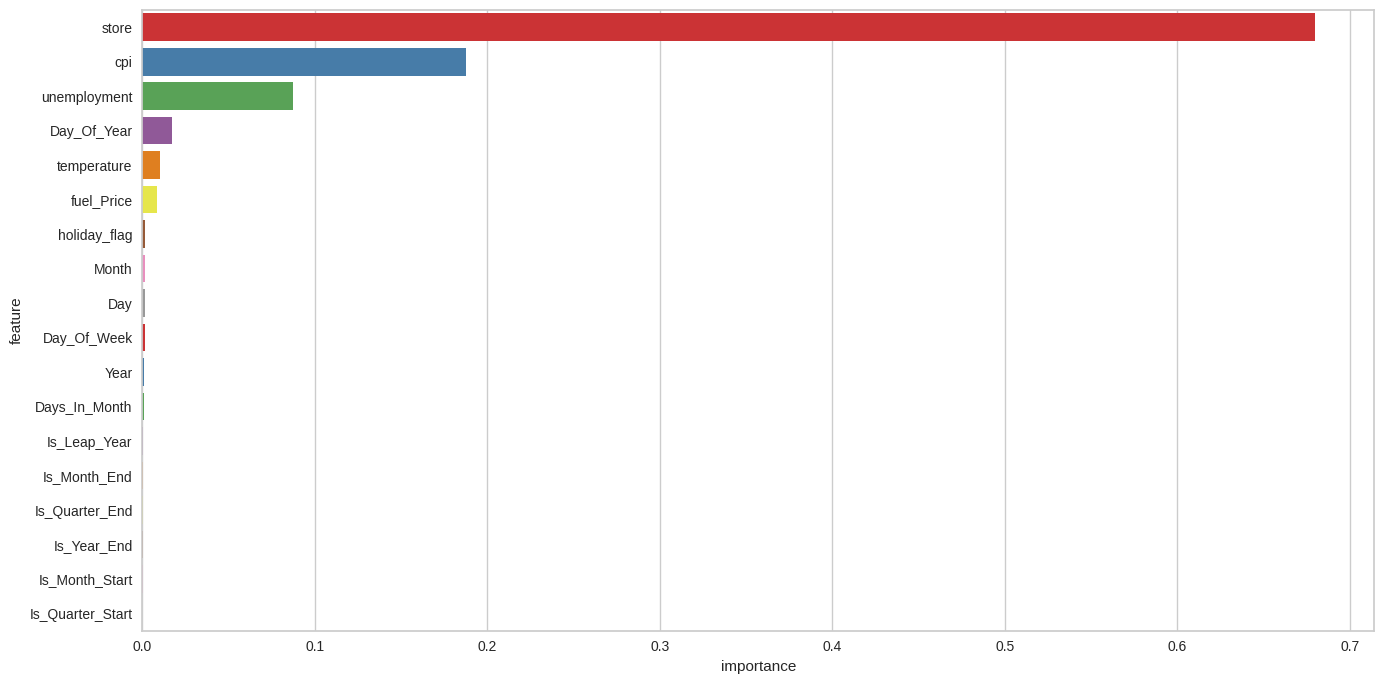

In [ ]:
feat_imps = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_}).sort_values('importance',ascending=False)
plt.figure(figsize=(14,7))
sns.barplot(x='importance',y='feature',data=feat_imps,orient='horizontal',palette='Set1')
plt.tight_layout();

In [ ]:
df.corr()['weekly_sales'].sort_values(ascending=False)[1:]

Month               0.050730
Day_Of_Year         0.048769
holiday_flag        0.029496
fuel_Price          0.016294
Is_Leap_Year       -0.006772
Days_In_Month      -0.008107
Year               -0.009913
Is_Month_Start     -0.011720
Is_Quarter_Start   -0.011894
Is_Year_End        -0.020678
Day                -0.020999
Day_Of_Week        -0.020999
Is_Month_End       -0.022571
Is_Quarter_End     -0.025321
cpi                -0.082511
temperature        -0.085931
unemployment       -0.087557
store              -0.308973
Name: weekly_sales, dtype: float64

In [ ]:
selected_features = ['store','cpi','unemployment','Day_Of_Year','temperature','Month','holiday_flag']

X_train = X_train[selected_features]
X_test = X_test[selected_features]

# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
features = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=features)
X_train.head()

,store,cpi,unemployment,Day_Of_Year,temperature,Month,holiday_flag
0,1.304226,-0.974622,-1.870001,-0.865484,-2.253026,-0.728108,-0.268562
1,1.458359,-1.013378,-0.580989,1.183872,0.511933,1.078226,-0.268562
2,-1.470166,-1.054563,-1.270860,-0.234913,0.109179,-0.125997,-0.268562
3,-1.470166,-1.109167,-0.292376,-1.397529,0.695575,-1.330220,-0.268562
4,-1.470166,-1.039096,-1.848716,0.740502,-1.509232,0.777170,-0.268562


# **Model Training-Evaluation**

In [ ]:
models = []
mape_scores = []
rmse_scores = []
r2_scores = []

In [ ]:
def train_and_evaluate_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test,pred)
    print("Mean Absolute Percentage Error(MAPE):",mape)
    mape_scores.append(mape)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    print("Root Mean Squared Error(RMSE):",rmse)
    rmse_scores.append(rmse)
    r2 = r2_score(y_test,pred)
    print("R2 Score:",r2)
    r2_scores.append(r2)
    models.append(model)

    if re.search('catboost',str(model)) == None or re.search('Voting',str(model)) != None:
        residuals_plot = ResidualsPlot(model)
        residuals_plot.fit(X_train,y_train)
        residuals_plot.score(X_test,y_test)
        residuals_plot.show()
        predictions_error = PredictionError(model)
        predictions_error.score(X_train,y_train)
        predictions_error.fit(X_train,y_train)
        predictions_error.show()

        if str(model) == 'LassoCV()':
            visualizer = AlphaSelection(LassoCV(alphas=np.logspace(-10,10,400)))
            visualizer.fit(X_train,y_train)
            visualizer.show()
        elif str(model) == 'RidgeCV()':
            visualizer = AlphaSelection(RidgeCV(alphas=np.logspace(-10,10,400)))
            visualizer.fit(X_train,y_train)
            visualizer.show()
        elif str(model) == 'ElasticNetCV()':
            visualizer = AlphaSelection(ElasticNetCV(alphas=np.logspace(-10,10,400)))
            visualizer.fit(X_train,y_train)
            visualizer.show()

Mean Absolute Percentage Error(MAPE): 1.8588602855362228
Root Mean Squared Error(RMSE): 0.9428056032781673
R2 Score: 0.13166572867067572


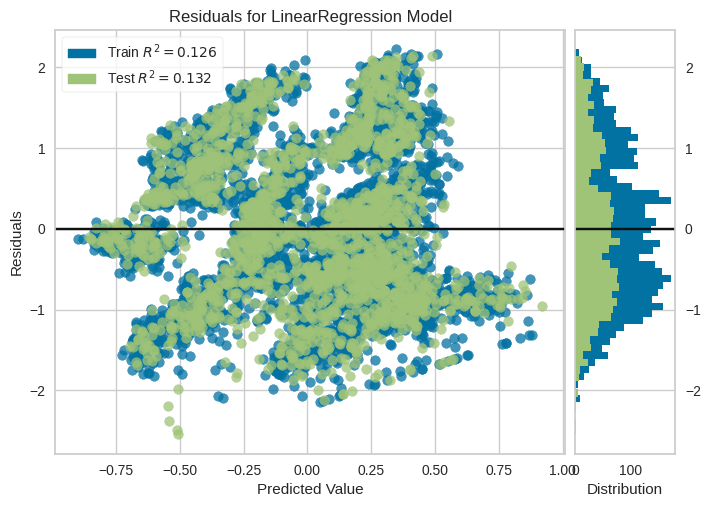

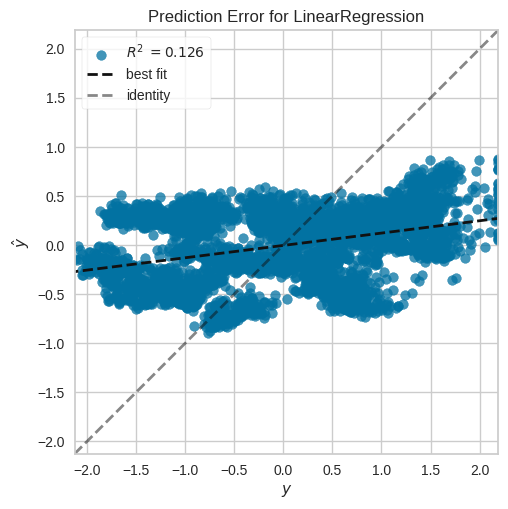

In [ ]:
train_and_evaluate_model(LinearRegression())

Mean Absolute Percentage Error(MAPE): 1.8721735939601105
Root Mean Squared Error(RMSE): 0.9430963176756088
R2 Score: 0.131130143830821


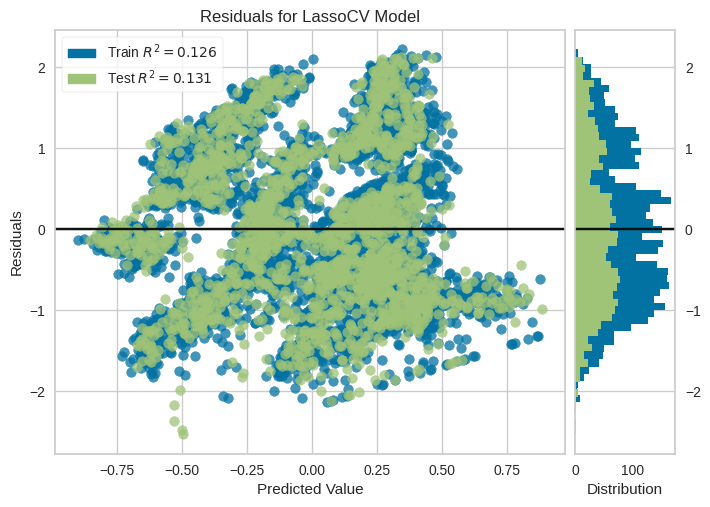

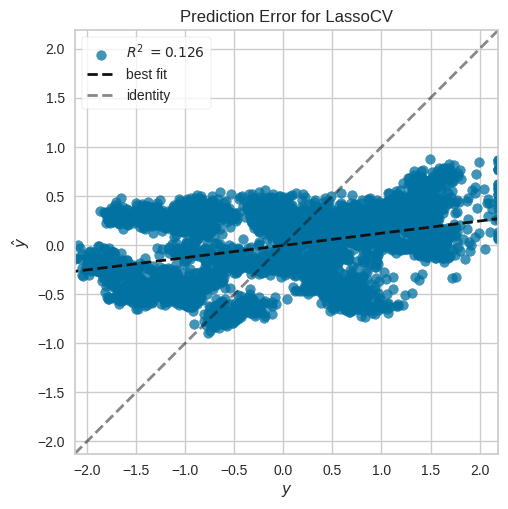

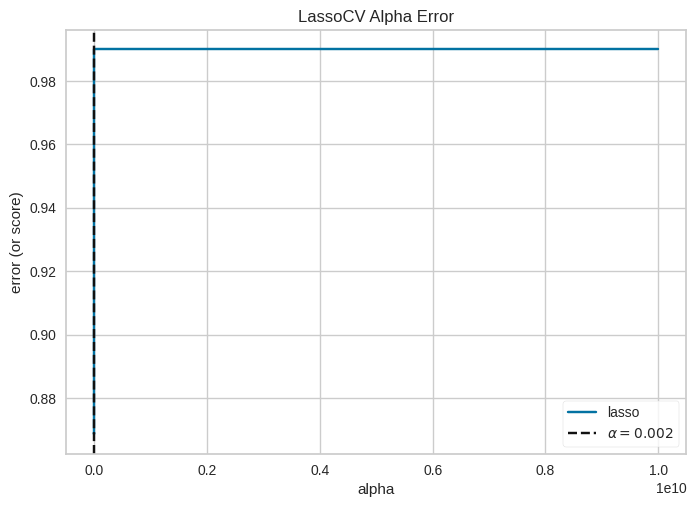

In [ ]:
train_and_evaluate_model(LassoCV())

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 4504, number of used features: 7
[LightGBM] [Info] Start training from score -0.003652
Mean Absolute Percentage Error(MAPE): 0.4836466164864434
Root Mean Squared Error(RMSE): 0.1289760326076023
R2 Score: 0.9837497270767015


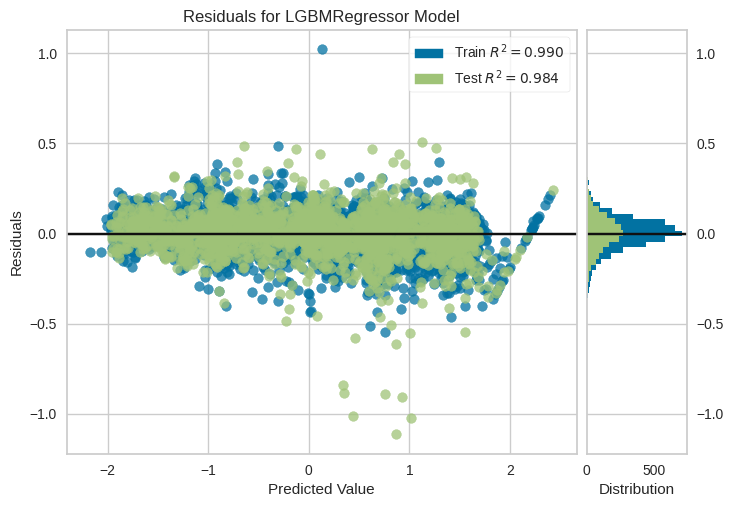

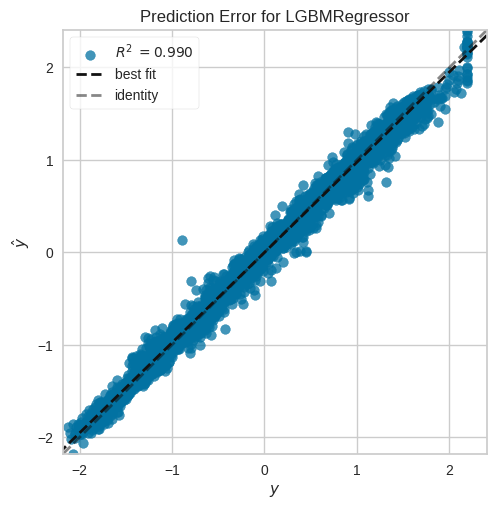

In [ ]:
train_and_evaluate_model(LGBMRegressor())

Mean Absolute Percentage Error(MAPE): 0.6231758054066658
Root Mean Squared Error(RMSE): 0.18117216285529444
R2 Score: 0.967935418927949


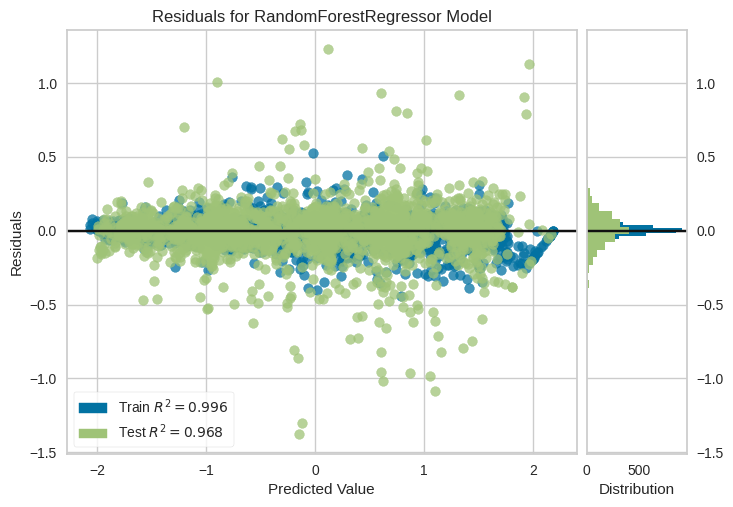

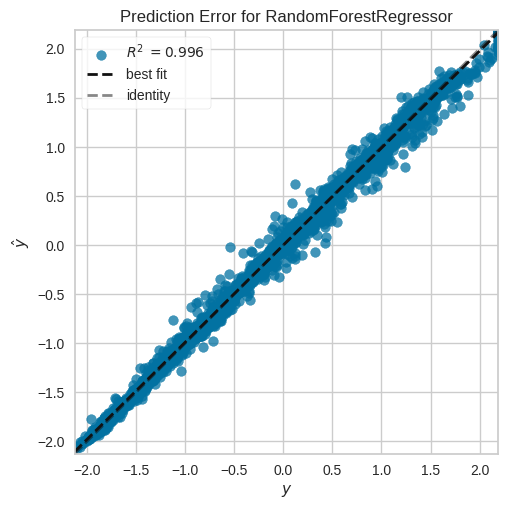

In [ ]:
train_and_evaluate_model(RandomForestRegressor())

Mean Absolute Percentage Error(MAPE): 1.869417394934279
Root Mean Squared Error(RMSE): 0.9431117395338787
R2 Score: 0.13110172743880832


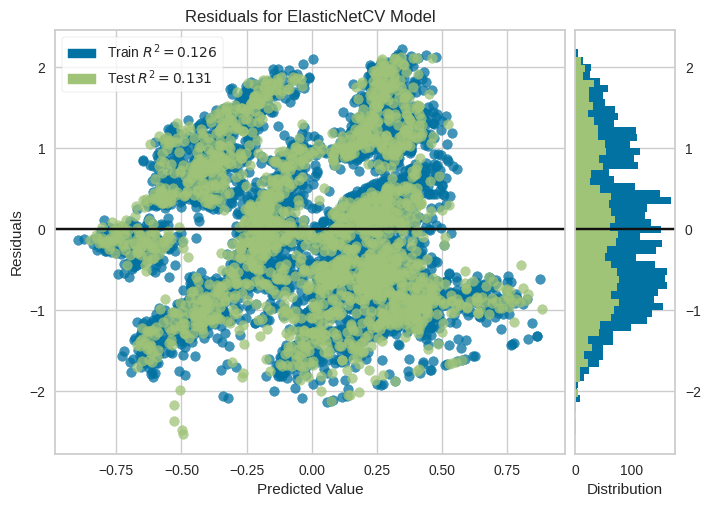

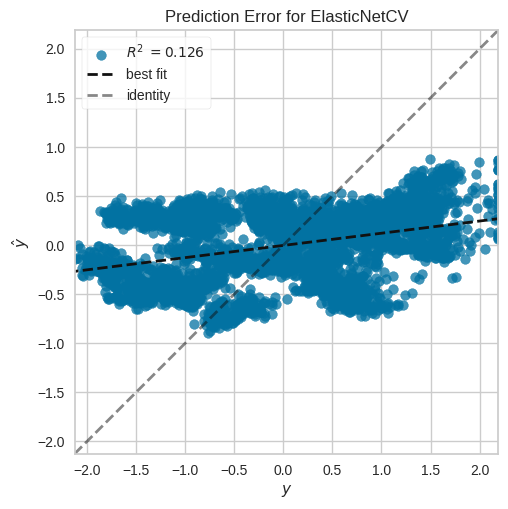

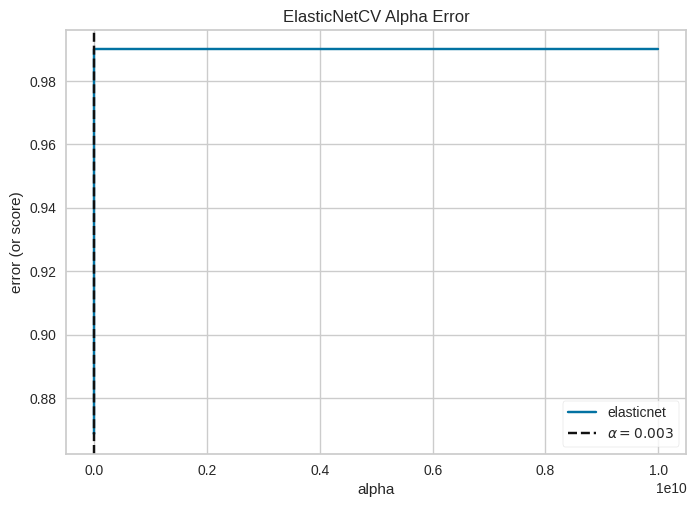

In [ ]:
train_and_evaluate_model(ElasticNetCV())

Mean Absolute Percentage Error(MAPE): 0.5870935791396844
Root Mean Squared Error(RMSE): 0.1772373235356761
R2 Score: 0.9693131013926871


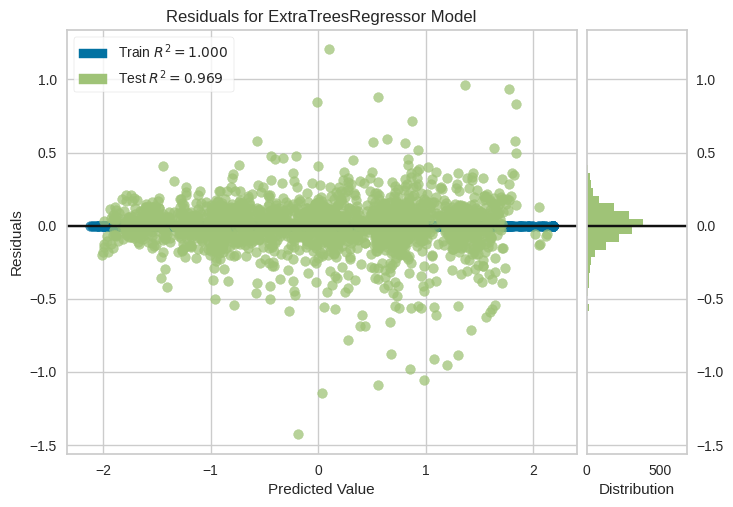

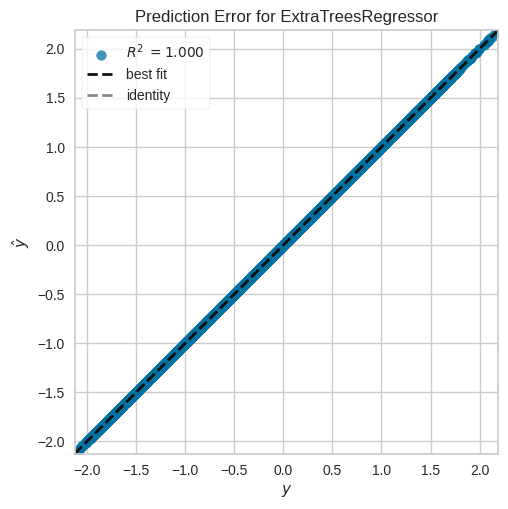

In [ ]:
train_and_evaluate_model(ExtraTreesRegressor())

Mean Absolute Percentage Error(MAPE): 1.5252582037997267
Root Mean Squared Error(RMSE): 0.30209150905999316
R2 Score: 0.910850344465775


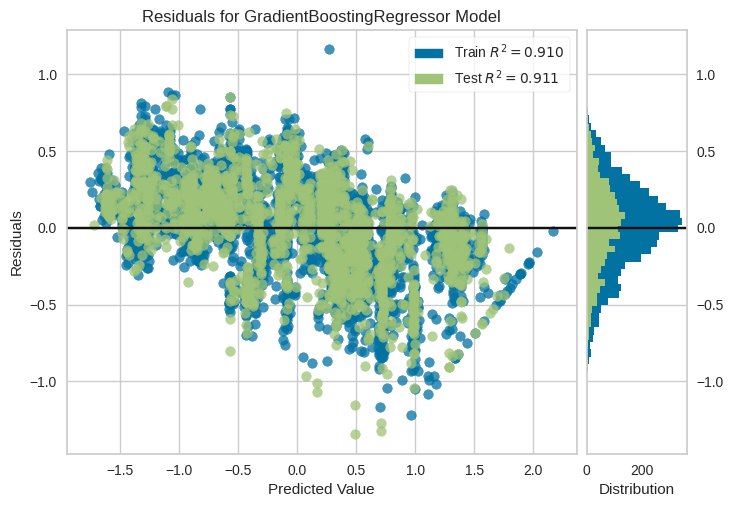

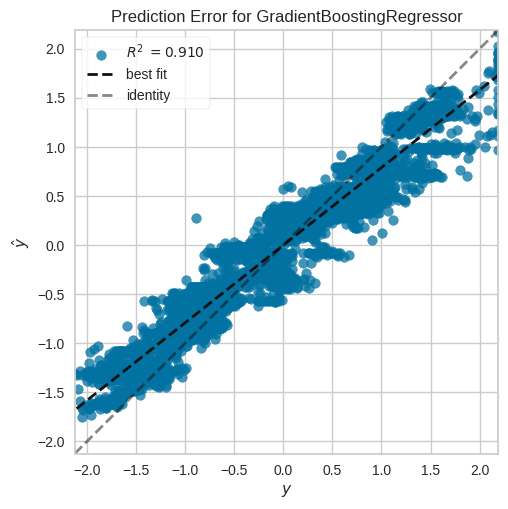

In [ ]:
train_and_evaluate_model(GradientBoostingRegressor())

Mean Absolute Percentage Error(MAPE): 1.425089166144783
Root Mean Squared Error(RMSE): 0.39106543521114934
R2 Score: 0.8506031308796111


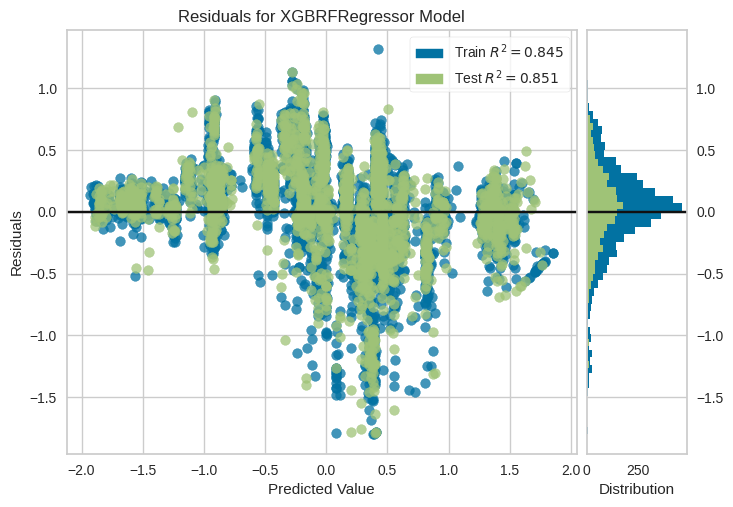

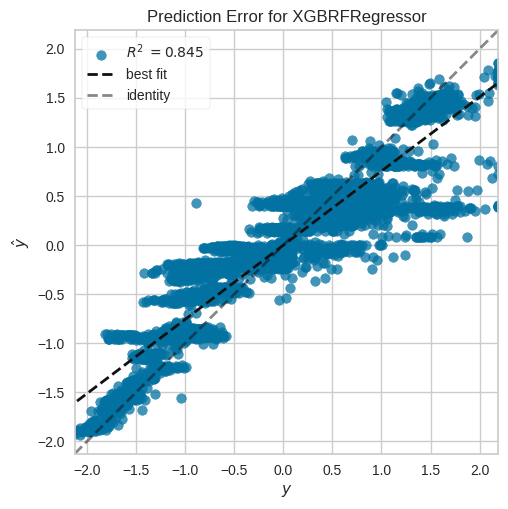

In [ ]:
train_and_evaluate_model(XGBRFRegressor())

In [ ]:
train_and_evaluate_model(CatBoostRegressor(silent=True))

Mean Absolute Percentage Error(MAPE): 0.5341453587985909
Root Mean Squared Error(RMSE): 0.12290887063346671
R2 Score: 0.9852426258469904


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 4504, number of used features: 7
[LightGBM] [Info] Start training from score -0.003652
Mean Absolute Percentage Error(MAPE): 0.4624450076282211
Root Mean Squared Error(RMSE): 0.13099644617914585
R2 Score: 0.9832366173063297


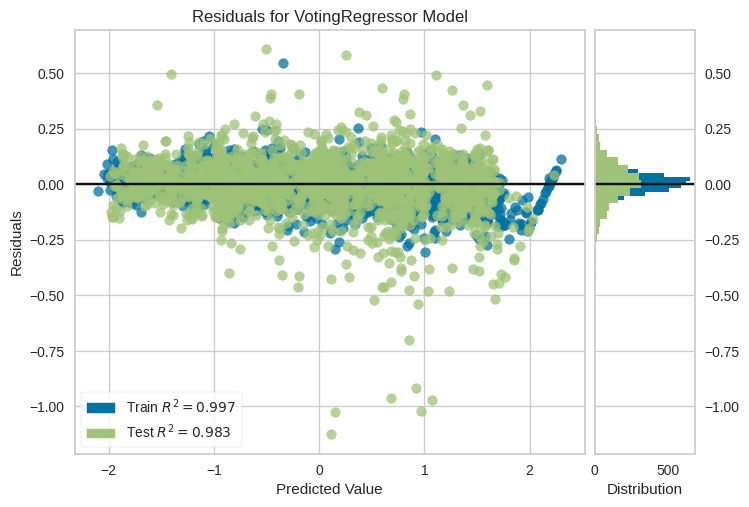

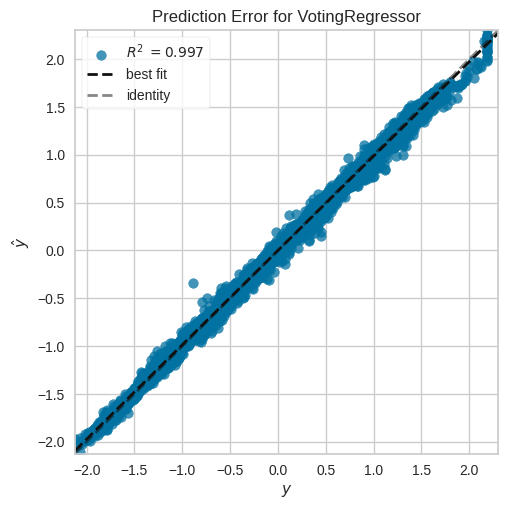

In [ ]:
train_and_evaluate_model(VotingRegressor(estimators=[
    ('CAT',CatBoostRegressor(silent=True)),
    ('XGB',XGBRegressor()),
    ('LGBM',LGBMRegressor()),
    ('HGB',HistGradientBoostingRegressor()),
    ('RF',RandomForestRegressor()),
    ('BAG',BaggingRegressor()),
    ('ET',ExtraTreesRegressor())
]))

# Model Performance DataFrame

In [ ]:
model_perfs = pd.DataFrame({'Model': models, 'MAPE': mape_scores, 'RMSE': rmse_scores, 'R2': r2_scores})
model_perfs = model_perfs.sort_values('R2',ascending=False)
model_perfs

,Model,MAPE,RMSE,R2
8,<catboost.core.CatBoostRegressor object at 0x7...,0.534145,0.122909,0.985243
2,LGBMRegressor(),0.483647,0.128976,0.983750
9,"VotingRegressor(estimators=[('CAT',\n ...",0.462445,0.130996,0.983237
5,"(ExtraTreeRegressor(random_state=1790397807), ...",0.587094,0.177237,0.969313
3,"(DecisionTreeRegressor(max_features=1.0, rando...",0.623176,0.181172,0.967935
6,([DecisionTreeRegressor(criterion='friedman_ms...,1.525258,0.302092,0.910850
7,"XGBRFRegressor(base_score=None, booster=None, ...",1.425089,0.391065,0.850603
0,LinearRegression(),1.858860,0.942806,0.131666
1,LassoCV(),1.872174,0.943096,0.131130
4,ElasticNetCV(),1.869417,0.943112,0.131102


# Hyperparameter Optimization with RandomizedSearchCV

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, criterion=friedman_mse, max_features=auto, n_estimators=200, oob_score=False; total time=   3.1s
[CV] END bootstrap=True, criterion=friedman_mse, max_features=auto, n_estimators=200, oob_score=False; total time=   2.7s
[CV] END bootstrap=True, criterion=friedman_mse, max_features=auto, n_estimators=200, oob_score=False; total time=   2.7s
[CV] END bootstrap=True, criterion=friedman_mse, max_features=auto, n_estimators=200, oob_score=False; total time=   2.8s
[CV] END bootstrap=True, criterion=friedman_mse, max_features=auto, n_estimators=200, oob_score=False; total time=   3.5s
[CV] END bootstrap=False, criterion=absolute_error, max_features=sqrt, n_estimators=200, oob_score=False; total time=  33.2s
[CV] END bootstrap=False, criterion=absolute_error, max_features=sqrt, n_estimators=200, oob_score=False; total time=  32.9s
[CV] END bootstrap=False, criterion=absolute_error, max_features=sqrt, n_estima

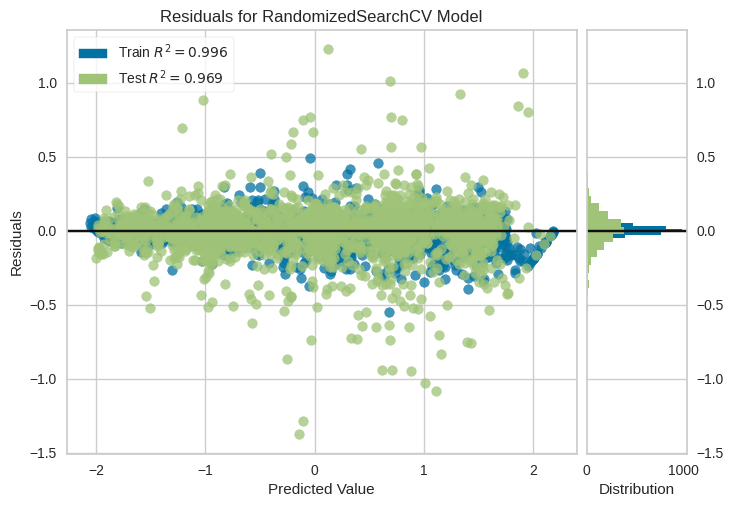

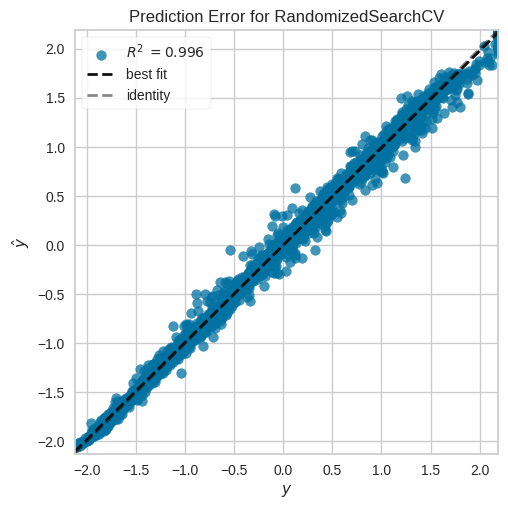

In [ ]:
param_grid = {'n_estimators': [200,400,600,800,1000],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
              'max_features': ['auto','sqrt','log2'],
              'bootstrap': [True,False],
              'oob_score': [True,False]}

grid_rf = RandomizedSearchCV(RandomForestRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_rf)

# Saving the model

In [ ]:
joblib.dump(LGBMRegressor,'weeklysales_predict.h5')

['weeklysales_predict.h5']

In [ ]:
model = joblib.load('weeklysales_predict.h5')
model

lightgbm.sklearn.LGBMRegressor

In [ ]:
joblib.dump(LinearRegression(),'weeklysales_predict1.h5')

['weeklysales_predict1.h5']

In [ ]:
model = joblib.load('weeklysales_predict1.h5')
model

LinearRegression()